# (연습) 1차원 데이터

**준비사항**

Numpy와 Pandas 라이브러리를 각각 np와 pd라는 별칭으로 불러온다

In [1]:
import numpy as np
import pandas as pd

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [2]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

**데이터 저장소 디렉토리**

코드에 사용되는 데이터 저장소의 기본 디렉토리를 지정한다.

In [3]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**문제 1**

기본 데이터 저장소에 있는 `sc_weir.csv` 파일은
광주광력시에서부터 전라남도 나주를 거쳐 서해까지 이어지는 영산강에 설치된 승촌보에서 측정한 
두 종류의 데이터를 담고 있다.

- `Chl-a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `Discharge`: 보에서 방출되는 시간당 방류량 수치 100개

클로로필-A 농도가 높을 수록 수질(water quality)이 나빠지며, 방류량이 많을 수록 클로로필-A 농도는 일반적으로 떨어지며,
두 데이터 사이의 상관관계를 확인하기 위해 수집되었다.

In [4]:
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_df

,Chl-a,Discharge
0,51,25
1,51,25
2,53,24
3,53,24
4,54,22
...,...,...
95,122,9
96,122,9
97,124,49
98,125,9


**데이터프레임 `values` 속성**

데이터프레임의 `values` 속성은 행과 열의 정보를 제외한 항목들로만 구성된
동일한 모양의 넘파이 어레이를 가리킨다.

In [5]:
sc_weir_arr = sc_weir_df.values

In [6]:
sc_weir_arr.shape

(100, 2)

처음 10개의 항목은 다음과 같다.

In [7]:
sc_weir_arr[:10]

array([[51, 25],
       [51, 25],
       [53, 24],
       [53, 24],
       [54, 22],
       [55, 22],
       [57, 21],
       [57, 21],
       [59, 20],
       [60, 20]])

(1) 방류량의 평균값을 계산하라.

답:

- 넘파이 활용

방류량은 1번 열의 데이터다.

In [8]:
discharge_arr = sc_weir_arr[:, 1]

In [9]:
np.mean(discharge_arr)

14.93

- 데이터프레임 활용

In [10]:
sc_weir_df['Discharge'].mean()

14.93

In [11]:
desc = sc_weir_df.describe()
mean_desc = desc.loc['mean']
mean_desc['Discharge']

14.93

(2) 방류량의 중앙값을 계산하라.

- 넘파이 활용

In [12]:
np.median(discharge_arr)

13.0

- 데이터프레임 활용

In [13]:
sc_weir_df['Discharge'].median()

13.0

In [14]:
desc = sc_weir_df.describe()
median_desc = desc.loc['50%']
median_desc['Discharge']

13.0

(3) 방류량의 최빈값을 계산하라.

- 넘파이 활용: 지원되지 않음.

- 데이터프레임 활용

In [15]:
sc_weir_df['Discharge'].mode()

0    11
Name: Discharge, dtype: int64

In [16]:
mode_desc = sc_weir_df['Discharge'].mode()

In [17]:
type(mode_desc)

pandas.core.series.Series

In [18]:
mode_desc.index

RangeIndex(start=0, stop=1, step=1)

In [19]:
mode_desc[0]

11

(4) 방류량의 제1, 제3 사분위수를 계산하라.

- 넘파이 활용

In [20]:
Q1 = np.percentile(discharge_arr, 25)
Q3 = np.percentile(discharge_arr, 75)
print(Q1, Q3, sep='\n')

11.0
16.0


- 데이터프레임 활용

In [21]:
desc.loc[['25%', '75%']]

,Chl-a,Discharge
25%,74.5,11.0
75%,114.5,16.0


(5) 클로로필-A 데이터의 범위를 계산하라.

- 넘파이 활용

클로로필-A 데이터는 0번 열이다.

In [22]:
chl_a_arr = sc_weir_arr[:, 0]

In [23]:
print('min:', chl_a_arr.min())
print('max:', chl_a_arr.max())
print('범위:', chl_a_arr.max() - chl_a_arr.min())

min: 51
max: 125
범위: 74


- 데이터프레임 활용

In [24]:
desc.loc[['min', 'max']]

,Chl-a,Discharge
min,51.0,9.0
max,125.0,52.0


In [25]:
(desc.loc['max'] - desc.loc['min']).loc['Chl-a']

74.0

(6) 클로로필-A 데이터의 분산을 계산하라.

- 넘파이 활용

In [26]:
np.var(chl_a_arr, ddof=0)

506.8004000000001

- 데이터프레임 활용

In [27]:
sc_weir_df.var(ddof=0)

Chl-a        506.8004
Discharge     40.2851
dtype: float64

In [28]:
sc_weir_df.var(ddof=0).loc['Chl-a']

506.80040000000014

(7) 클로로필-A 데이터의 표준편차를 계산하라.

- 넘파이 활용

In [29]:
np.std(chl_a_arr,ddof=0)

22.51222778847087

- 데이터프레임 활용

In [30]:
sc_weir_df.std(ddof=0)

Chl-a        22.512228
Discharge     6.347054
dtype: float64

In [31]:
sc_weir_df.std(ddof=0).loc['Chl-a']

22.512227788470874

**문제 2**

기본 데이터 저장소에 있는 `california_housing.csv` 파일은 미국 캘리포니아 주의 주택 정보를 담고 있다.

(1) 위 파일의 내용을 데이터프레임으로 불러와서 `housing_df` 변수에 할당하라. 단, 인덱스는 별도로 지정하지 않는다.

In [32]:
housing_df = pd.read_csv(data_url+'california_housing.csv')

In [33]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


(2) `total_rooms` 특성값만으로 구성된 데이터프레임을 이용하여 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, 사분범위를 구하라. 또한 상자 그림을 그리고 정규화를 진행한다.

`total_rooms` 특성만 갖는 데이터프레임을 지정한다.

In [34]:
total_rooms = housing_df.loc[:, ['total_rooms']]
total_rooms

,total_rooms
0,880.0
1,7099.0
2,1467.0
3,1274.0
4,1627.0
...,...
20635,1665.0
20636,697.0
20637,2254.0
20638,1860.0


- 평균값과 중앙값은 `describe()` 메서드로 확인. 범위와 사분범위 정보도 추출 가능.

In [35]:
total_rooms.describe()

,total_rooms
count,20640.000000
mean,2635.763081
std,2181.615252
min,2.000000
25%,1447.750000
50%,2127.000000
75%,3148.000000
max,39320.000000


- 분산

In [36]:
total_rooms.var(ddof=0)

total_rooms    4.759215e+06
dtype: float64

- 표준편차

In [37]:
total_rooms.std(ddof=0)

total_rooms    2181.562402
dtype: float64

- 상자범위

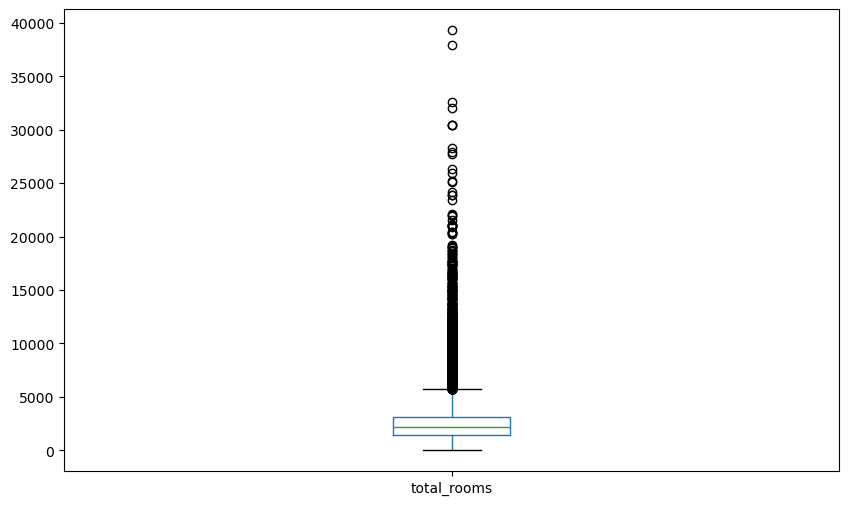

In [38]:
total_rooms.boxplot(grid=False)
plt.show()

- 데이터프레임 정규화: min-max 스케일링

In [39]:
minmax = (total_rooms - total_rooms.min()) / (total_rooms.max() - total_rooms.min())
minmax

,total_rooms
0,0.022331
1,0.180503
2,0.037260
3,0.032352
4,0.041330
...,...
20635,0.042296
20636,0.017676
20637,0.057277
20638,0.047256


In [40]:
minmax.describe()

,total_rooms
count,20640.000000
mean,0.066986
std,0.055486
min,0.000000
25%,0.036771
50%,0.054046
75%,0.080014
max,1.000000


- 데이터프레임 정규화: 표준화

In [41]:
z = (total_rooms - total_rooms.mean()) / total_rooms.std(ddof=0)
z

,total_rooms
0,-0.804819
1,2.045890
2,-0.535746
3,-0.624215
4,-0.462404
...,...
20635,-0.444985
20636,-0.888704
20637,-0.174995
20638,-0.355600


In [42]:
z.describe()

,total_rooms
count,2.064000e+04
mean,3.408126e-17
std,1.000024e+00
min,-1.207283e+00
25%,-5.445698e-01
50%,-2.332104e-01
75%,2.348028e-01
max,1.681558e+01


넘파이 어레이를 이용한 정규화도 물론 가능하다.

In [43]:
total_rooms_arr = total_rooms.values
total_rooms_arr.shape

(20640, 1)

- 어레이 정규화: min-max 스케일링

In [44]:
minmax_arr = (total_rooms_arr - np.min(total_rooms_arr)) / (np.max(total_rooms_arr) - np.min(total_rooms_arr))
minmax_arr

array([[0.02233074],
       [0.18050257],
       [0.03726029],
       ...,
       [0.05727657],
       [0.04725571],
       [0.07078183]])

In [45]:
np.min(minmax_arr)

0.0

In [46]:
np.max(minmax_arr)

1.0

- 어레이 정규화: 표준화

In [47]:
z_arr = (total_rooms_arr - np.mean(total_rooms_arr)) / np.std(total_rooms_arr)
z_arr

array([[-0.8048191 ],
       [ 2.0458901 ],
       [-0.53574589],
       ...,
       [-0.17499526],
       [-0.35559977],
       [ 0.06840827]])

In [48]:
np.mean(z_arr)

3.201573373337661e-17

In [49]:
np.std(z_arr)

1.0